In [ ]:
# default_exp 
from nbdev.showdoc import *
import numpy as np
import torch
device = 'cpu'
# device = torch.device('mps' if torch.has_mps else 'cpu')
%load_ext autoreload
%autoreload 2
print("Using device ", device)

Using device  cpu


In [ ]:
torch.__version__

'1.11.0'

# Testing the Flow Embedder

Setting up a few simple test cases:

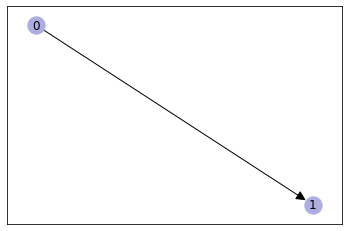

In [ ]:
from directed_graphs.datasets import SmallRandom, visualize_graph, ChainGraph
import torch_geometric
from torch_geometric.utils import to_networkx
dataset = ChainGraph()
data = dataset[0]
visualize_graph(data)

And let's embed this with the Flow Embedder!

In [ ]:
from directed_graphs.flow_embedding import FlowEmbedder
fe = FlowEmbedder(data,"euclidean",5)

c:\Users\gtham\OneDrive - Pomona College\2022 Summer\Github Repositories\directed_graphs\directed_graphs\flow_embedding.py:62: UserWarning: Graph is not strongly connected. Embedding results are not guaranteed. Consider tweaking the constant for 'disconnected distance'.
  # TODO optimize with vectors


In [ ]:
embeddings = fe.fit()

100%|██████████| 1000/1000 [00:05<00:00, 195.07it/s]

Exiting training with loss  tensor(0.1980, grad_fn=<PowBackward0>)


In [ ]:
fe.embedding_D

tensor([[0.0000e+00, 2.8163e-01],
        [9.9756e+02, 0.0000e+00]], grad_fn=<CopySlices>)

In [ ]:
fe.flow_field_parameters

Parameter containing:
tensor([-0.4560,  0.3644], requires_grad=True)

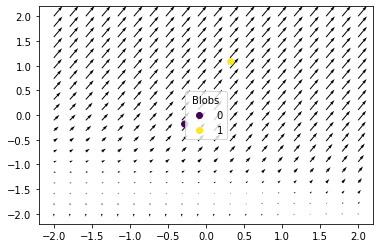

In [ ]:
fe.visualize_points()

In [ ]:
fe.flow_field_parameters

Parameter containing:
tensor([-0.4560,  0.3644], requires_grad=True)

In [ ]:
fe.flow_field_parameters2

Parameter containing:
tensor([ 1.4550, -0.4527], requires_grad=True)

# More Complex (but still simple) Graphs

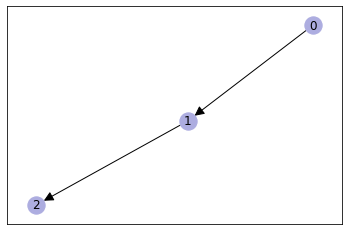

In [ ]:
from directed_graphs.datasets import SmallRandom, visualize_graph, ChainGraph2, ChainGraph3
import torch_geometric
from torch_geometric.utils import to_networkx
dataset = ChainGraph2(num_nodes=3)
data = dataset[0]
visualize_graph(data)

100%|██████████| 1000/1000 [00:10<00:00, 92.82it/s]

Exiting training with loss  tensor(22.3735, grad_fn=<PowBackward0>)


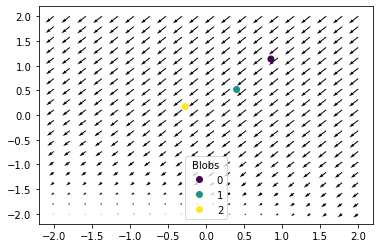

In [ ]:
from directed_graphs.flow_embedding import FlowEmbedder
fe = FlowEmbedder(data,"euclidean",5)
embeddings = fe.fit()
fe.visualize_points()

In [ ]:
fe.embedding_D

tensor([[0.0000e+00, 1.6590e-01, 3.0010e-01],
        [6.9420e+01, 0.0000e+00, 1.6601e-01],
        [1.3759e+04, 6.7684e+01, 0.0000e+00]], grad_fn=<CopySlices>)

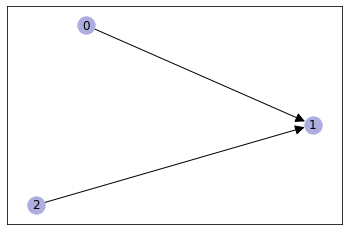

In [ ]:
dataset = ChainGraph3(num_nodes=3)
data = dataset[0]
visualize_graph(data)

/Users/adjourner/Projects/directed_graphs/directed_graphs/flow_embedding.py:56: UserWarning: Graph is not strongly connected. Embedding results are not guaranteed. Consider tweaking the constant for 'disconnected distance'.
  
100%|██████████| 5000/5000 [01:33<00:00, 53.66it/s]


Exiting training with loss  tensor(0.1847, grad_fn=<PowBackward0>)


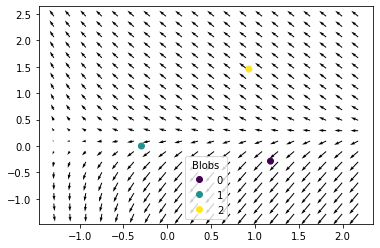

In [ ]:
from directed_graphs.flow_embedding import FlowEmbedder
fe = FlowEmbedder(data,"euclidean",5)
embeddings = fe.fit(n_steps = 5000)
fe.visualize_points()

In [ ]:
fe.embedding_D

tensor([[0.0000, 4.2229, 4.0284],
        [4.1775, 0.0000, 1.0123],
        [2.7304, 2.0506, 0.0000]], grad_fn=<CopySlices>)

In [ ]:
fe.ground_truth_distances

tensor([[   0.,    1., 1000.],
        [1000.,    0., 1000.],
        [1000.,    1.,    0.]])

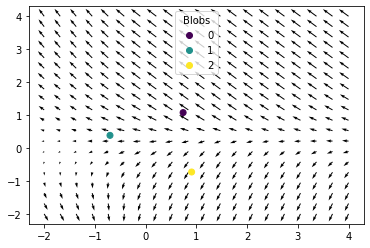

In [ ]:
import torch
import matplotlib.pyplot as plt
x, y = np.meshgrid(np.linspace(-2,4,20),np.linspace(-2,4,20))
x = torch.tensor(x,dtype=float)
y = torch.tensor(y,dtype=float)
xy_t = torch.concat([x[:,:,None],y[:,:,None]],dim=2).float()

uv = fe.flowfield(xy_t).detach()
u = uv[:,:,0]
v = uv[:,:,1]
""" 
quiver 
  plots a 2D field of arrows
  quiver([X, Y], U, V, [C], **kw); 
  X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.
"""
plt.quiver(x,y,u,v)
sc = plt.scatter(fe.embedded_points[:,0].detach(),fe.embedded_points[:,1].detach(), c=list(range(fe.nnodes)))
plt.legend(handles = sc.legend_elements()[0], title="Blobs", labels=list(range(fe.nnodes)))
"""Display all open figures."""
plt.show()

In [ ]:
fe.embedding_D

tensor([[0.0000e+00, 9.9999e-01, 9.9990e+02],
        [1.0000e+03, 0.0000e+00, 9.9999e+02],
        [1.0000e+03, 1.0000e+00, 0.0000e+00]], grad_fn=<CopySlices>)

In [ ]:
fe.ground_truth_distances

tensor([[   0.,    1., 1000.],
        [1000.,    0., 1000.],
        [1000.,    1.,    0.]])

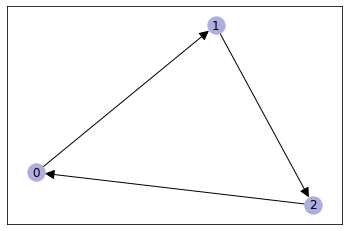

In [ ]:
from directed_graphs.datasets import CycleGraph
dataset = CycleGraph(num_nodes=3)
data = dataset[0]
visualize_graph(data)

100%|██████████| 2000/2000 [00:21<00:00, 92.17it/s]

Exiting training with loss  tensor(0.2097, grad_fn=<PowBackward0>)


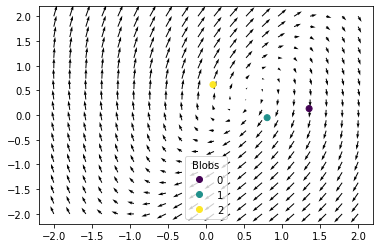

In [ ]:
from directed_graphs.flow_embedding import FlowEmbedder
# data = data.to(device)
fe = FlowEmbedder(data,"euclidean",5)
# fe = fe.to(device)
embeddings = fe.fit(n_steps = 2000)
fe.visualize_points()

In [ ]:
fe.embedding_D

tensor([[0.0000, 1.2085, 1.7351],
        [1.9624, 0.0000, 0.2115],
        [1.1821, 1.4001, 0.0000]], grad_fn=<CopySlices>)

In [ ]:
fe.ground_truth_distances

tensor([[0., 1., 2.],
        [2., 0., 1.],
        [1., 2., 0.]])

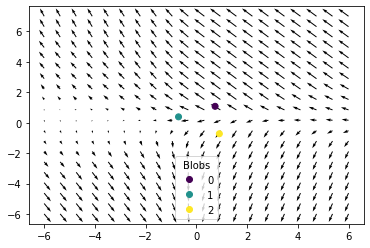

In [ ]:
import torch
import matplotlib.pyplot as plt
x, y = np.meshgrid(np.linspace(-6,6,20),np.linspace(-6,7,20))
x = torch.tensor(x,dtype=float)
y = torch.tensor(y,dtype=float)
xy_t = torch.concat([x[:,:,None],y[:,:,None]],dim=2).float()

uv = fe.flowfield(xy_t).detach()
u = uv[:,:,0]
v = uv[:,:,1]
""" 
quiver 
  plots a 2D field of arrows
  quiver([X, Y], U, V, [C], **kw); 
  X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.
"""
plt.quiver(x,y,u,v)
sc = plt.scatter(fe.embedded_points[:,0].detach(),fe.embedded_points[:,1].detach(), c=list(range(fe.nnodes)))
plt.legend(handles = sc.legend_elements()[0], title="Blobs", labels=list(range(fe.nnodes)))
"""Display all open figures."""
plt.show()

In [ ]:
fe.embedding_D

tensor([[ 0.0000,  1.0003, 16.1217],
        [ 1.9802,  0.0000, 11.8456],
        [12.3768, 15.4520,  0.0000]], grad_fn=<CopySlices>)

In [ ]:
fe.ground_truth_distances

tensor([[0., 1., 2.],
        [2., 0., 1.],
        [1., 2., 0.]])

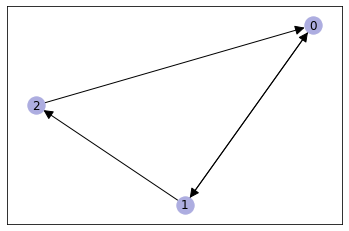

In [ ]:
from directed_graphs.datasets import HalfCycleGraph
dataset = HalfCycleGraph(num_nodes=3)
data = dataset[0]
visualize_graph(data)

100%|██████████| 2000/2000 [00:20<00:00, 96.27it/s]


Exiting training with loss  tensor(0., grad_fn=<PowBackward0>)


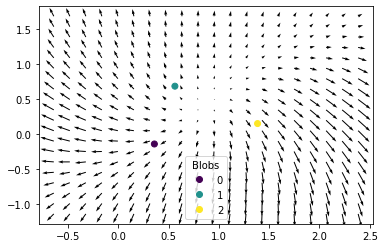

Embedding distances are tensor([[0.0000, 1.0000, 2.0000],
        [1.0000, 0.0000, 1.0000],
        [1.0000, 2.0000, 0.0000]], grad_fn=<CopySlices>)
vs ground truth tensor([[0., 1., 2.],
        [1., 0., 1.],
        [1., 2., 0.]])


In [ ]:
from directed_graphs.flow_embedding import FlowEmbedder
# data = data.to(device)
fe = FlowEmbedder(data,"euclidean",5)
# fe = fe.to(device)
embeddings = fe.fit(n_steps = 2000)
fe.visualize_points()
print("Embedding distances are",fe.embedding_D)
print("vs ground truth",fe.ground_truth_distances)

In [ ]:
fe.embedding_D

tensor([[0.0000, 4.2229, 4.0284],
        [4.1775, 0.0000, 1.0123],
        [2.7304, 2.0506, 0.0000]], grad_fn=<CopySlices>)

In [ ]:
fe.ground_truth_distances

tensor([[0., 1., 2.],
        [1., 0., 1.],
        [1., 2., 0.]])

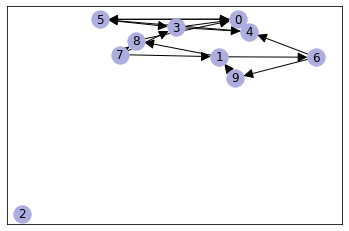

In [ ]:
from directed_graphs.datasets import SmallRandom
dataset = SmallRandom(num_nodes=10)
data = dataset[0]
visualize_graph(data)

/Users/adjourner/Projects/directed_graphs/directed_graphs/flow_embedding.py:54: UserWarning: Graph is not strongly connected. Embedding results are not guaranteed. Consider tweaking the constant for 'disconnected distance'.
  warnings.warn("Graph is not strongly connected. Embedding results are not guaranteed. Consider tweaking the constant for 'disconnected distance'.")
100%|██████████| 2000/2000 [05:04<00:00,  6.56it/s]


Exiting training with loss  tensor(558.3409, grad_fn=<PowBackward0>)


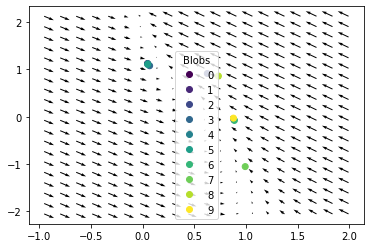

Embedding distances are tensor([[0.0000e+00, 1.3808e+03, 1.1047e+02, 9.2714e-02, 9.9058e-02, 9.8848e-02,
         1.3496e+03, 1.0534e+03, 5.6511e+02, 1.6504e+03],
        [2.0582e+00, 0.0000e+00, 2.2264e-01, 2.7254e+00, 1.9129e+00, 2.6642e+00,
         1.0744e-01, 4.2343e+01, 2.0544e-01, 8.8909e-02],
        [7.7632e-01, 4.4056e+02, 0.0000e+00, 2.7046e-01, 7.6824e-01, 8.7626e-01,
         4.9306e+02, 7.9543e+04, 5.9900e-01, 3.5965e+02],
        [1.0703e-01, 1.4142e+03, 4.6694e+01, 0.0000e+00, 1.0608e-01, 1.0601e-01,
         1.3901e+03, 1.2098e+03, 2.5965e+02, 8.8433e+02],
        [1.0093e-01, 1.3871e+03, 1.0907e+02, 9.3810e-02, 0.0000e+00, 9.9829e-02,
         1.3571e+03, 1.0643e+03, 5.5502e+02, 1.6543e+03],
        [1.0121e-01, 1.3847e+03, 1.0335e+02, 9.3654e-02, 1.0023e-01, 0.0000e+00,
         1.3539e+03, 1.0949e+03, 5.2277e+02, 1.6514e+03],
        [1.7111e+00, 9.3191e-02, 2.2244e-01, 2.2605e+00, 1.5935e+00, 2.2062e+00,
         0.0000e+00, 3.8997e+01, 2.0499e-01, 8.3041e-02],
   

In [ ]:
from directed_graphs.flow_embedding import FlowEmbedder
# data = data.to(device)
fe = FlowEmbedder(data,"euclidean",5,disconnected_distance_constant=50)
# fe = fe.to(device)
embeddings = fe.fit(n_steps = 2000)
fe.visualize_points()
print("Embedding distances are",fe.embedding_D)
print("vs ground truth",fe.ground_truth_distances)